The challenge is from [here](https://www.aicrowd.com/challenges/ai-blitz-xii/problems/programming-language-classification/notebooks).

In [ ]:
!pip install aicrowd-cli
%load_ext aicrowd.magic

In [ ]:
%aicrowd login

In [ ]:
!rm -rf data
!mkdir data
%aicrowd ds dl -c programming-language-classification -o data

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score

from sklearn import set_config
set_config(display="diagram")

plt.rcParams["figure.figsize"] = (15,6)

In [2]:
#load and read datasets
trainData = pd.read_csv("data/train.csv")
testData = pd.read_csv("data/test.csv")

In [4]:
#five first rows of trainData
trainData.head()

,id,code,language
0,14026,var result = testObj1 | testObj2;\...,c-sharp
1,12201,/// Initializes a new instance of ...,c-sharp
2,17074,/*\n\n Explanation :- a user gives a Strin...,javascript
3,21102,int sum = 0;\n\n for (int i = ...,c-plus-plus
4,53065,if (p->data < min)\n\n {\n\n ...,c


In [5]:
#five first rows of testData
testData.head()

,id,code
0,10684,28 = 22 + 23 + 24\n\n 33 = 32 + 23 + 24\n\n 49...
1,17536,this.path = path;\n\n this.estimat...
2,26383,{\n\n ...
3,29090,"/**\n\n * Class for converting from ""any"" bas..."
4,10482,"{ cout<<""Destructing base \n""; } ..."


/Users/maxhager/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='language', ylabel='count'>

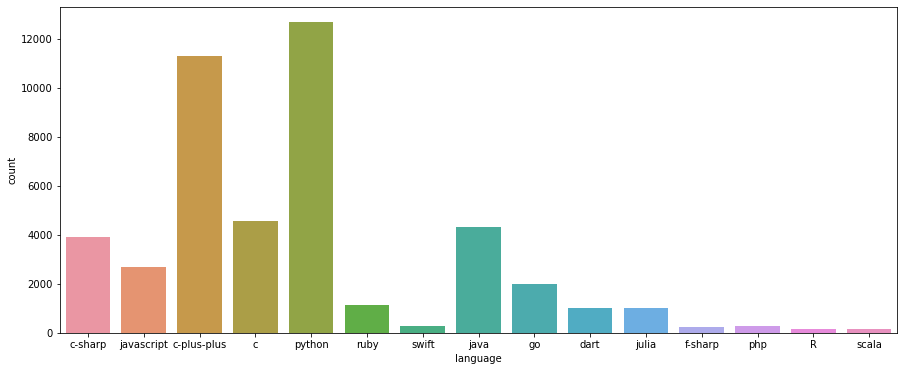

In [6]:
#distribution of programming languages in a plot
sn.countplot(trainData["language"])

In [16]:
#import of label encoder. 
from sklearn.preprocessing import LabelEncoder
#encodes target values with labels between 0 and 1.
LE = LabelEncoder().fit(trainData.language)
trainData["target"] = LE.transform(trainData.language)

AttributeError: 'numpy.ndarray' object has no attribute 'language'

In [15]:
trainData.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'